# Scénario

Vous êtes consultant Data Analyst chez Lapage, une grande librairie généraliste en ligne très réputée. Vous êtes directement rattaché au service Marketing.

![Food](https://user.oc-static.com/upload/2020/11/23/16061367402655_Capture%20d%E2%80%99e%CC%81cran%202020-11-23%20a%CC%80%2014.05.04.png)

Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. Vous intervenez car l’entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients, etc.

## Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import chi2_contingency 

## Déclaration des Fonctions

In [2]:
def keyTester(df):
    """Fonction qui vérifie si la clé du dataframe peut être utilisée comme clé primaire"""
    # On compare la taille du dataframe avant et après la suppression des doublons
    if df.size == df[~df.index.duplicated(keep='first')].size :
        print("La clé peut être utilisée comme clé primaire car elle est unique")
    else:
        print("La clé ne peut être utilisée comme clé primaire car elle n'est pas unique")
        print(f"Voici le nombre de doublons : {df.index[df.index.duplicated(keep='first')].nunique()}")
    
    # On print la forme du Dataframe
    print(f"Le dataframe contient {df.shape} (lignes, colonnes)")

## Charger et voir les données 

## Analyse de la forme des données

### 1- Données sur les clients

In [3]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P6_darosa_kim\\DAN-P6-donnees\\DAN-P6-donnees\\customers.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_customers=df_1.copy()


In [4]:
df_customers.head()

,sex,birth
client_id,,
c_4410,f,1967
c_7839,f,1975
c_1699,f,1984
c_5961,f,1962
c_5320,m,1943


In [6]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8623 entries, c_4410 to c_84
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     8623 non-null   object
 1   birth   8623 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 202.1+ KB


#### Compter les valeurs NaN 

In [10]:
(df_customers.isnull().sum()/df_customers.shape[0]).sort_values(ascending=True)

sex      0.0
birth    0.0
dtype: float64

Il n'y a aucune valeur manquante.

#### Compter les valeurs de la colonne **birth**

In [16]:
plt.figure()
df_customers["birth"].value_counts()

2004-01-01    440
1979-01-01    215
1988-01-01    207
1986-01-01    203
1978-01-01    199
             ... 
1933-01-01      8
1932-01-01      6
1931-01-01      4
1930-01-01      4
1929-01-01      3
Name: birth, Length: 76, dtype: int64

<Figure size 432x288 with 0 Axes>

On remarque qu'il y a beaucoup de personnes ayant 18 ans, peut être qu'il faut être majeur pour pouvoir s'inscrire sur le site et ils ont dû mentir sur leur age. 

#### Compter les valeurs de la colonne **sex**

In [28]:
plt.figure()
df_customers["sex"].value_counts()

f    4491
m    4132
Name: sex, dtype: int64

<Figure size 432x288 with 0 Axes>

In [4]:
keyTester(df_customers)

La clé peut être utilisée comme clé primaire car elle est unique
Le dataframe contient (8623, 2) (lignes, colonnes)


Il n'y a aucun prétraitement à faire sur ce Dataframe.

### 2- Données sur les produits

In [4]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P6_darosa_kim\\DAN-P6-donnees\\DAN-P6-donnees\\products.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_products=df_1.copy()


In [18]:
df_products.head()

,price,categ
id_prod,,
0_1421,19.99,0
0_1368,5.13,0
0_731,17.99,0
1_587,4.99,1
0_1507,3.99,0


In [6]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0_1421 to 0_1920
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   3287 non-null   float64
 1   categ   3287 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 77.0+ KB


#### Convertir le dtype de la colonne **categ** en object car c'est une catégorie donc une valeur qualitative

In [7]:
df_products["categ"] = df_products["categ"].astype("object")

#### Compter les valeurs NaN 

In [24]:
(df_products.isnull().sum()/df_products.shape[0]).sort_values(ascending=True)

price    0.0
categ    0.0
dtype: float64

Il n'y a aucune valeur manquante.

#### Compter les valeurs de la colonne **categ** et **price**

In [23]:
plt.figure()
df_products["categ"].value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

<Figure size 432x288 with 0 Axes>

La cat0 est la plus abondante.

In [30]:
plt.figure()
df_products["price"].value_counts()

4.99     85
6.99     84
3.99     80
5.99     78
8.99     74
         ..
4.13      1
2.84      1
13.13     1
18.77     1
9.00      1
Name: price, Length: 1455, dtype: int64

<Figure size 432x288 with 0 Axes>

In [8]:
keyTester(df_products)

La clé peut être utilisée comme clé primaire car elle est unique
Le dataframe contient (3287, 2) (lignes, colonnes)


Il n'y a aucun autre prétraitement à faire sur ce Dataframe.

### 3- Données sur les transactions

In [5]:
url = 'C:\\Users\\asus\\OneDrive\\Cours Openclassrooms\\P6_darosa_kim\\DAN-P6-donnees\\DAN-P6-donnees\\transactions.csv'
df_1 = pd.read_csv(url, index_col=0, encoding = "utf-8")
df_transactions=df_1.copy()


In [32]:
df_transactions.head()

,date,session_id,client_id
id_prod,,,
0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [33]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 679532 entries, 0_1518 to 1_523
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        679532 non-null  object
 1   session_id  679532 non-null  object
 2   client_id   679532 non-null  object
dtypes: object(3)
memory usage: 20.7+ MB


#### Compter les valeurs NaN 

In [36]:
(df_transactions.isnull().sum()/df_transactions.shape[0]).sort_values(ascending=True)

date          0.0
session_id    0.0
client_id     0.0
dtype: float64

Il n'y a aucune valeur manquante.

In [10]:
keyTester(df_transactions)

La clé ne peut être utilisée comme clé primaire car elle n'est pas unique
Voici le nombre de doublons : 3249
Le dataframe contient (679532, 3) (lignes, colonnes)


#### Compter le nombre de clients unique

In [117]:
df_transactions.index.nunique() 

3266

#### Compter les valeurs de la colonne **date**

In [38]:
plt.figure()
df_transactions["date"].value_counts()

test_2021-03-01 02:30:02.237413    13
test_2021-03-01 02:30:02.237444     8
test_2021-03-01 02:30:02.237427     8
test_2021-03-01 02:30:02.237428     8
test_2021-03-01 02:30:02.237414     8
                                   ..
2022-01-02 11:50:26.298391          1
2021-12-03 20:43:02.536365          1
2021-07-23 01:24:22.395175          1
2021-05-02 14:03:17.898852          1
2022-01-27 21:48:02.206867          1
Name: date, Length: 679371, dtype: int64

<Figure size 432x288 with 0 Axes>

Ici, l'on peut remarquer qu'il y a une anomalie dans la colonne **date**. Une chaîne de caractère a été ajouté donc impossible de convertir le dtype en datetime.

Le prétraitement serait de supprimer ces lignes.

In [11]:
df_transactions[df_transactions['date'].str.contains("test_")]

,date,session_id,client_id
id_prod,,,
T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...
T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1


L'id_prod **T_0** représente un id test. 

Suppression de ces lignes

In [6]:
df_transactions = df_transactions[~df_transactions['date'].str.contains("test_")]

Et maintenant, je peux convertir le dtype de la colonne **date** en datetime

In [7]:
df_transactions["date"]= pd.to_datetime(df_transactions['date'])


#### Compter les valeurs de la colonne **session_id** et **client_id**

In [39]:
plt.figure()
df_transactions["session_id"].value_counts()

s_0         200
s_118668     14
s_96857      13
s_215292     13
s_21005      13
           ... 
s_314833      1
s_221956      1
s_255832      1
s_4278        1
s_138107      1
Name: session_id, Length: 342316, dtype: int64

<Figure size 432x288 with 0 Axes>

In [40]:
plt.figure()
df_transactions["client_id"].value_counts()

c_1609    25488
c_6714     9187
c_3454     6773
c_4958     5195
c_3263      403
          ...  
c_6292        1
c_1624        1
c_240         1
c_4478        1
c_8351        1
Name: client_id, Length: 8602, dtype: int64

<Figure size 432x288 with 0 Axes>

# MISSIONS données par Antoine

### **1- Différents indicateurs et graphiques autour du chiffre d'affaires, avec notamment l’évolution dans le temps**

Ici, je fais 2 jointures :
 - df_products avec df_transaction sur la colonne id_prod (référence des produits)
 - jointure précédente avec df_customers sur la colonne client_id (identifiant unique client)

In [9]:
df = pd.merge(df_products, df_transactions, how = "outer", on= "id_prod")

In [24]:
df

,price,categ,date,session_id,client_id
id_prod,,,,,
0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389
0_1421,19.99,0,2022-11-19 03:42:20.707442,s_299590,c_8364
0_1421,19.99,0,2021-09-19 14:58:46.726179,s_92304,c_3544
0_1421,19.99,0,2023-01-11 16:04:24.367855,s_325369,c_1025
0_1421,19.99,0,2021-08-01 19:33:18.877168,s_70071,c_2298
...,...,...,...,...,...
0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453


Je remarque qu'il y a des caractéristiques produits manquantes, probablement des nouveaux produits qui n'ont pas été référencé sur le site. Il faudrait en parler avec l'équipe pricing.

In [13]:
df.loc["0_2245"]

,price,categ,date,session_id,client_id
id_prod,,,,,
0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746
0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713
0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108
0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391
0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954
...,...,...,...,...,...
0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131
0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167
0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453


Je décide de remplacer le prix de ces NaN par la médiane des catégories 0 car la cat0 est la plus abondante.

In [14]:
df["price"].fillna(df[(df["categ"] == 0)]["price"].median(), inplace =True)

Et je les associe à la cat0

In [15]:
df["categ"].fillna(0, inplace =True)

J'ajoute une colonne **id_prod** car après la fusion elle disparaîtra et j'en aurais besoin pour la suite.

In [16]:
df["id_prod"] = df.index

Je passe à la 2ème jointure :

In [48]:
df3 = pd.merge(df ,df_customers, how = "outer", on= "client_id")

Je mets la colonne date en index pour les futures manipulations sur le CA

In [49]:
df3 = df3.set_index(pd.DatetimeIndex(df3['date']))
df3.drop(columns="date", inplace=True)

Je crée une colonne Age pour la mission sur le profil client

In [50]:
df3["Age"] = df3.index.year - df3.birth

Regardons les non correspondances de la fusion

In [507]:
df3[df3.index.isnull()]

,price,categ,session_id,client_id,id_prod,sex,birth,Age,nb vente,CA par produit
date,,,,,,,,,,
NaT,35.06,0,NaN,NaN,0_1016,NaN,NaN,NaN,NaN,NaN
NaT,1.67,0,NaN,NaN,0_1780,NaN,NaN,NaN,NaN,NaN
NaT,-1.00,0,NaN,NaN,T_0,NaN,NaN,NaN,NaN,NaN
NaT,20.08,0,NaN,NaN,0_1062,NaN,NaN,NaN,NaN,NaN
NaT,2.99,0,NaN,NaN,0_1119,NaN,NaN,NaN,NaN,NaN
NaT,1.15,0,NaN,NaN,0_1014,NaN,NaN,NaN,NaN,NaN
NaT,31.82,1,NaN,NaN,1_0,NaN,NaN,NaN,NaN,NaN
NaT,20.92,0,NaN,NaN,0_1318,NaN,NaN,NaN,NaN,NaN
NaT,22.05,0,NaN,NaN,0_1800,NaN,NaN,NaN,NaN,NaN


L'on voit que la première partie montre des références produits avec leurs caractéristiques mais sans le client_id associé donc on ne sait pas par qui le produit a été acheté.

Enfin la 2ème partie représente simplement le profil client mais sans références produits du coup nous ne savons pas quel produit il a acheté et s'il en a acheté (peut être un client qui s'est inscrit sans acheter).

Après avoir calculé le Chiffre d'affaires Total, je les supprimerai car trop peu d'informations et cela n'influera pas sur l'étude du dataset.

### Chiffre d'affaires Total 

In [36]:
print(f"CA total est de : {round(df3.price.sum() / 10 **6,2)} Millions")

CA total est de : 11.85 Millions


Suppression des NaN

In [51]:
df3 = df3[df3.index.notnull()]

#### Créer un Dataframe pour calculer le chiffre d'affaires par année afin de répondre à la requête

In [676]:
CA_per_y=[df3.loc["2021-03":"2022-02"]['price'].sum(), 
              df3.loc["2022-03":"2023-03"]['price'].sum()
            
             ]
client_per_y = [df3.loc["2021-03":"2022-02"]['client_id'].nunique(),
               df3.loc["2022-03":"2023-03"]['client_id'].nunique()
               ]
age_mean_y = [round(df3.loc["2021-03":"2022-02"]["Age"].mean()),
             round(df3.loc["2022-03":"2023-03"]["Age"].mean())]

cat0_CA_y = [df3.loc["2021-03":"2022-02"][(df3.loc["2021-03":"2022-02"].categ == 0)]["price"].sum(),
            df3.loc["2022-03":"2023-02"][(df3.loc["2022-03":"2023-02"].categ == 0)]["price"].sum()]

cat1_CA_y = [df3.loc["2021-03":"2022-02"][(df3.loc["2021-03":"2022-02"].categ == 1)]["price"].sum(),
            df3.loc["2022-03":"2023-02"][(df3.loc["2022-03":"2023-02"].categ == 1)]["price"].sum()]

cat2_CA_y = [df3.loc["2021-03":"2022-02"][(df3.loc["2021-03":"2022-02"].categ == 2)]["price"].sum(),
            df3.loc["2022-03":"2023-02"][(df3.loc["2022-03":"2023-02"].categ == 2)]["price"].sum()]

Sum = {'Année': [2021,2022],
         'Nb Clients' : client_per_y,
        "Chiffre d'affaires":CA_per_y,
       "Age Moyen" : age_mean_y,
       "Cat0_CA" : cat0_CA_y,
       "Cat1_CA" : cat1_CA_y,
       "Cat2_CA" : cat2_CA_y
        }

df3_CA = pd.DataFrame(Sum, columns = ['Année',"Nb Clients","Chiffre d'affaires", "Age Moyen","Cat0_CA","Cat1_CA","Cat2_CA"])

Je filtre par ordre décroissant les années , je convertis le dtype de la colonne **Année** en datetime et je le mets en index

In [677]:
df3_CA = df3_CA.sort_values(by="Année", ascending= True)
df3_CA["Année"] = pd.to_datetime(df3_CA["Année"], format="%Y")
df3_CA = df3_CA.set_index(pd.DatetimeIndex(df3_CA['Année']))
df3_CA.drop(columns="Année", inplace=True)

In [678]:
df3_CA["Revenu Moyen par Client"] = df3_CA["Chiffre d'affaires"] / df3_CA["Nb Clients"] 


In [23]:
df3_CA

,Nb Clients,Chiffre d'affaires,Age Moyen,Cat0_CA,Cat1_CA,Cat2_CA,Revenu Moyen par Client
Année,,,,,,,
2021-01-01,8600,5831737.05,43,2230428.29,2247384.41,1353924.35,678.108959
2022-01-01,8524,6021991.63,44,2189302.68,2406338.28,1426350.67,706.474851


In [690]:
df3_CA.loc['Total']= df3_CA.sum(numeric_only=True, axis=0)

In [697]:
df3_CA

,Nb Clients,Chiffre d'affaires,Age Moyen,Cat0_CA,Cat1_CA,Cat2_CA,Revenu Moyen par Client
Année,,,,,,,
2021-01-01 00:00:00,8598.0,5510938.31,43.0,2031177.46,2213622.09,1266138.76,640.955840
2022-01-01 00:00:00,8524.0,6021991.63,44.0,2189302.68,2406338.28,1426350.67,706.474851
Total,8561.0,11532929.94,43.0,4220480.14,4619960.37,2692489.43,1347.430691


#### Soyons plus précis, je crée un Dataframe pour calculer le chiffre d'affaires par trimestre

In [553]:
CA_per_y=df3.resample("3M")['price'].sum()
            
             
client_per_y =df3.resample("3M")['client_id'].nunique()
               
age_mean_y = round(df3.resample("3M")["Age"].mean())

cat0_CA_y = df3[(df3.categ == 0)].resample("3M")["price"].sum()

cat1_CA_y =df3[(df3.categ == 1)].resample("3M")["price"].sum()

cat2_CA_y = df3[(df3.categ == 2)].resample("3M")["price"].sum()

Sum = {  
         'Nb Clients' : client_per_y,
        "Chiffre d'affaires":CA_per_y,
       "Age Moyen" : age_mean_y,
       "Cat0_CA" : cat0_CA_y,
       "Cat1_CA" : cat1_CA_y,
       "Cat2_CA" : cat2_CA_y
        }

df3T_CA = pd.DataFrame(Sum, columns = [ "Nb Clients","Chiffre d'affaires", "Age Moyen","Cat0_CA","Cat1_CA","Cat2_CA"])

In [554]:
df3T_CA["Revenu Moyen par Client"] = df3T_CA["Chiffre d'affaires"] / df3T_CA["Nb Clients"] 

In [555]:
df3T_CA

,Nb Clients,Chiffre d'affaires,Age Moyen,Cat0_CA,Cat1_CA,Cat2_CA,Revenu Moyen par Client
date,,,,,,,
2021-03-31,5676,482440.61,43.0,193629.17,186974.17,101837.27,84.996584
2021-06-30,7832,1453141.33,43.0,569352.33,511193.79,372595.21,185.538985
2021-09-30,7831,1472360.87,43.0,558842.32,542128.43,371390.12,188.016967
2021-12-31,7785,1362883.75,43.0,561196.63,537699.46,263987.66,175.065350
2022-03-31,7734,1576367.02,44.0,538872.78,675873.82,361620.42,203.822992
2022-06-30,7770,1506147.66,44.0,553804.46,602708.66,349634.54,193.841398
2022-09-30,7740,1511364.92,44.0,547799.00,600709.35,362856.57,195.266786
2022-12-31,7726,1514802.21,44.0,552494.22,605983.36,356324.63,196.065520
2023-03-31,7085,974220.31,45.0,343740.06,390451.65,240028.60,137.504631


### Représentation graphique de l'évolution du Chiffre d'affaires 

#### Soyons plus précis en représentant le CA par catégorie et par mois

In [24]:
cat_0= df3["price"][(df3.categ == 0) ].resample('M').sum()
cat_1= df3["price"][(df3.categ == 1)].resample('M').sum()
cat_2= df3["price"][(df3.categ == 2) ].resample('M').sum()

Sum = { 
       "Cat0_CA" : cat_0,
       "Cat1_CA" : cat_1,
       "Cat2_CA" : cat_2
        }
df3_Cat = pd.DataFrame(Sum, columns = ["Cat0_CA","Cat1_CA","Cat2_CA"])

<AxesSubplot:xlabel='date'>

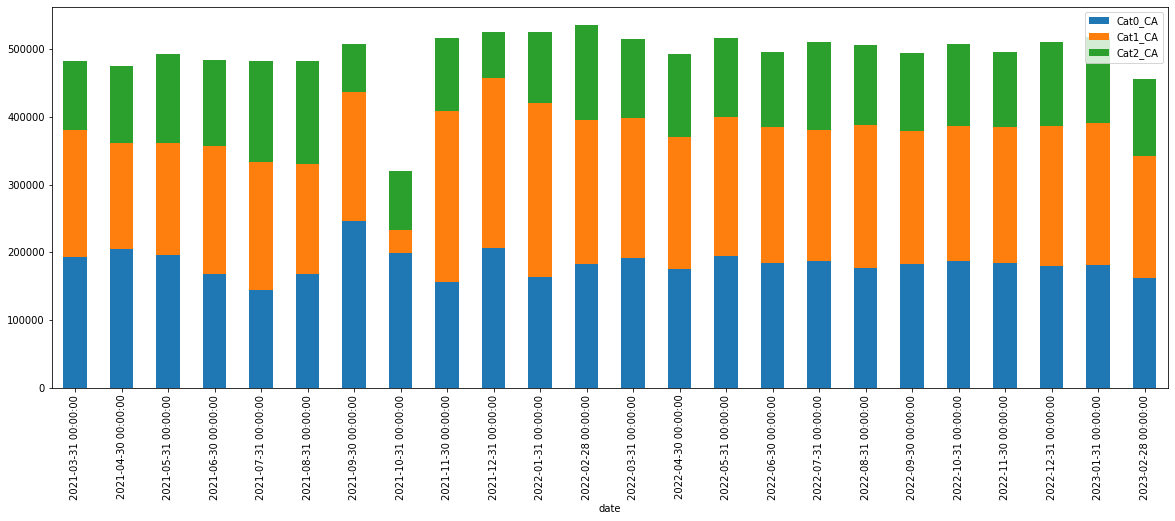

In [68]:
df3_Cat.plot.bar(stacked=True,figsize=(20,7))

Il y a une baisse étrange, vérifions les ventes du mois d'Octobre

In [578]:
dayCa0 = df3["price"][(df3.categ == 0)].resample('D').sum()
dayCa1 = df3["price"][(df3.categ == 1)].resample('D').sum()
dayCa2 = df3["price"][(df3.categ == 2)].resample('D').sum()

Text(0.5, 1.0, "Evolution du CA par catégorie pour le mois d'Octobre")

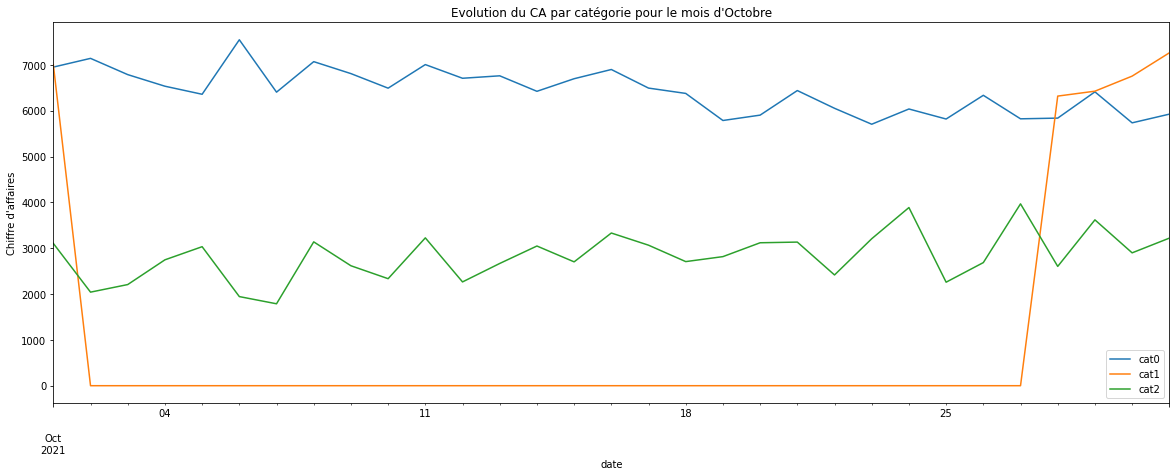

In [497]:
dayCa0.loc["2021-10"].plot(kind='line', subplots=False,figsize=(20,7))
dayCa1.loc["2021-10"].plot(kind='line', subplots=False,figsize=(20,7))
dayCa2.loc["2021-10"].plot(kind='line', subplots=False,figsize=(20,7))
plt.ylabel("Chiffre d'affaires")
plt.legend(["cat0","cat1","cat2"])
plt.title("Evolution du CA par catégorie pour le mois d'Octobre")


On remarque que pour le mois d'Octobre dans la catégorie 1, il y a très peu de ventes. Probablement dû à un problème technique sur le site.

Je décide donc de supprimer le mois d'Octobre car cela peu biaiser le dataset.

In [52]:
df3.drop(df3.loc["2021-10"].index, inplace=True)

### **Répartition des catégories en volume**

Je créé une liste unique des categories 

In [60]:
cat= df3.categ.unique().tolist()
lst_cat =[]
for x in cat:
 lst_cat.append(df3.categ[df3.categ == x].count())

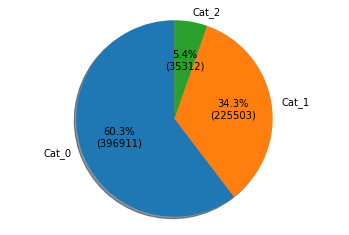

In [82]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cat_0', 'Cat_1', 'Cat_2'
sizes = [lst_cat[0],
       lst_cat[1],
        lst_cat[2]]
explode = ( 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*sum(allvals) ,2) )
    return "{:.1f}%\n({:.0f})".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_cat),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Les produits de la catégorie 0 sont ceux qui se vendent le plus.

### **Représentation Graphique : Répartition du CA par Catégorie**

In [26]:
cat= df3.categ.unique().tolist()
lst_cat =[]
for x in cat:
 lst_cat.append(df3[df3.categ == x].price.sum())

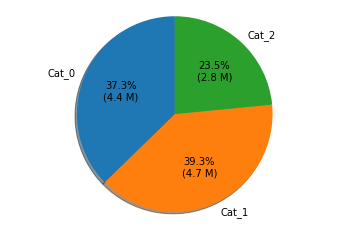

In [108]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Cat_0', 'Cat_1', 'Cat_2'
sizes = [lst_cat[0],
       lst_cat[1],
        lst_cat[2]]
explode = ( 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*np.sum(allvals)/ 10**6 ,2) )
    return "{:.1f}%\n({:.1f} M)".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_cat),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Les produits qui rapportent le plus en termes de CA sont ceux de la catégorie 1.

### **Répartition des prix par catégorie**

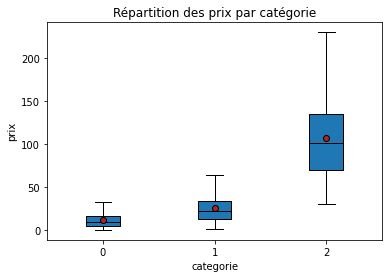

In [430]:
X = "categ"
Y = "price"

modalites = df_uniq[X].unique()
groupes = []
for m in modalites:
    groupes.append(df_uniq[df_uniq[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops 
            , patch_artist=True, showmeans=True, meanprops=meanprops)
plt.xlabel("categorie")
plt.ylabel("prix")
plt.title("Répartition des prix par catégorie")

plt.show()

C'est possible que les catégories soient des gammes de produits. 

Par ex: livres de poche (pour la cat 0), livres récemment sortis (cat1) et accessoires liés aux aventures d'une saga (cat2)

Regardons les valeurs aberrantes pour vérifier s'il n'y a pas d'erreurs au niveau du pricing.

{'whiskers': [<matplotlib.lines.Line2D at 0x262373db880>,
 'caps': [<matplotlib.lines.Line2D at 0x262373dbfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x262373db4f0>],
 'medians': [<matplotlib.lines.Line2D at 0x262373e9700>],
 'fliers': [<matplotlib.lines.Line2D at 0x262373e9a90>],
 'means': []}

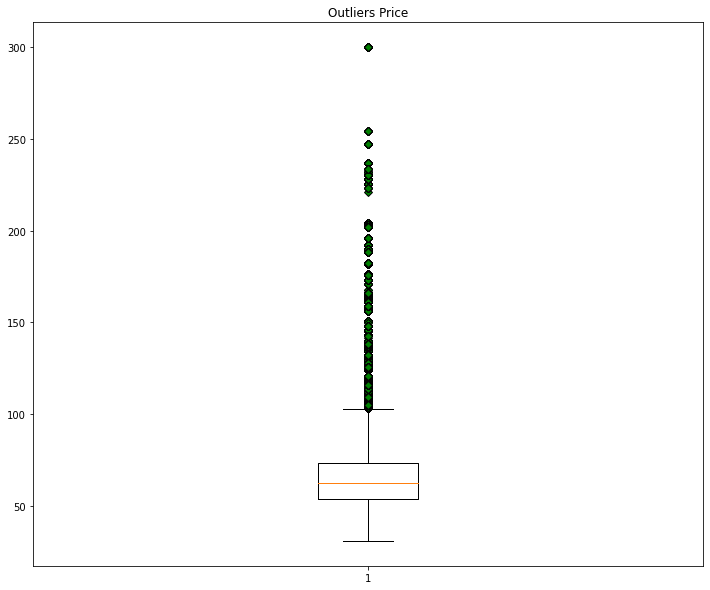

In [27]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots(1, figsize=(12, 10))
ax3.set_title('Outliers Price')
ax3.boxplot(df["price"][df["categ"] == 2], flierprops=green_diamond)

In [26]:
# Prix moyen
mean = np.mean(df["price"][df["categ"] == 2])
# Ecart type du prix
std = np.std(df["price"][df["categ"] == 2])
print('La moyenne de la cat2 de price est : ', round(mean,2))
print("L'écart type de la cat2 de price est : ", round(std,2))

La moyenne de la cat2 de price est :  76.21
L'écart type de la cat2 de price est :  39.76


In [40]:
threshold = 1.5
outlier = []
nb=0
for i in df["price"].unique():
    z = (i-mean)/std
    if z > threshold:
        nb+=1
        outlier.append(i)
print(f"\nUn Z-Score supérieur à 1.5 révèle un outlier.\nIl y a {nb} valeurs aberrantes.")
print('Les valeurs aberrantes dans price sont : ', outlier)


Un Z-Score supérieur à 1.5 révèle un outlier.
Il y a 53 valeurs aberrantes.
Les valeurs aberrantes dans price sont :  [225.17, 157.99, 201.74, 156.99, 158.17, 167.49, 157.42, 247.22, 162.03, 170.99, 145.45, 175.99, 254.44, 228.11, 181.99, 172.99, 300.0, 191.99, 157.63, 155.99, 203.99, 145.99, 142.99, 176.2, 175.67, 163.94, 236.99, 189.99, 220.99, 182.3, 139.99, 136.99, 222.97, 141.32, 231.99, 164.99, 136.07, 150.72, 166.21, 202.99, 188.48, 230.04, 160.99, 138.53, 158.99, 233.54, 138.32, 150.69, 195.99, 149.74, 142.58, 201.99, 147.99]


Voyons à combien de produits sont assignés ces outliers

In [47]:
df.id_prod[df["price"].isin(outlier)].nunique()

61

On se renseignant auprès de l'équipe pricing, il ne s'agit pas de valeurs aberrantes mais atypiques donc nous n'avons pas besoin de les supprimer.

## **2- Zoom sur les références produits**

#### Top des références produits les plus vendus

In [96]:
df_top_ref5 = df3.id_prod.value_counts().head()

In [83]:
df3noNaN =  df3.dropna()

Text(0.5, 0.98, 'Top 5 des références produits les plus vendus')

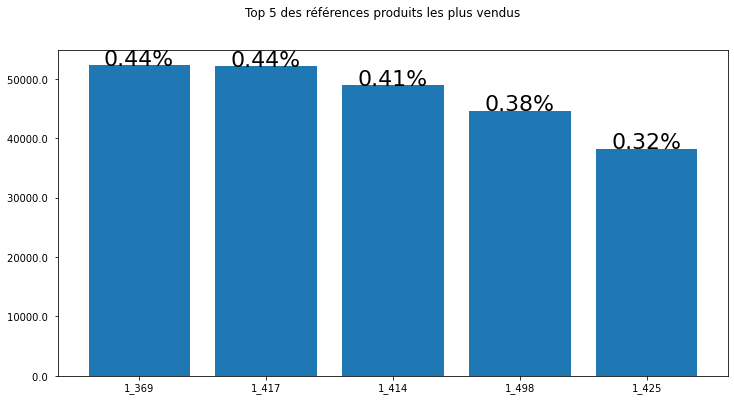

In [117]:
names = df_top_ref5.index
values = (df_top_ref5 * df3["price"][df3.id_prod.isin(df_top_ref5.index)].unique()).sort_values(ascending=False)
def tonnes(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f} '.format(x)
fig, axs = plt.subplots(1, figsize=(12, 6))
axs.yaxis.set_major_formatter(tonnes)
axs.bar(names, values)

totals = []

# find the values and append to list
for i in axs.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in axs.patches:
    
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/(df3.price.sum() ))*100, 2))+'%', fontsize=22,
                color='black')
fig.suptitle("Top 5 des références produits les plus vendus")

Créer une colonne nb_vente pour calculer le CA par produit

In [134]:
df["nb vente"] = df.index.value_counts()

Colonne représentant le CA par produit

In [136]:
df["CA par produit"]= (df["nb vente"] * df["price"])

Suppression des doublons de l'index

In [137]:
df_uniq = df[~df.index.duplicated(keep='first')].dropna()

#### Tableaux des références les plus vendus

In [138]:
df_uniq[df_uniq.index.isin(df_top_ref5.index)].sort_values(by='CA par produit', ascending=False)

,price,categ,date,session_id,client_id,id_prod,nb vente,CA par produit
id_prod,,,,,,,,
1_369,23.99,1,2022-08-12 21:21:37.350040,s_252381,c_1464,1_369,2252,54025.48
1_414,23.83,1,2022-11-13 09:02:12.691434,s_296911,c_5785,1_414,2180,51949.40
1_498,23.37,1,2023-02-08 15:31:41.086311,s_338728,c_7453,1_498,2128,49731.36
1_417,20.99,1,2022-01-19 21:56:40.441341,s_152293,c_8229,1_417,2189,45947.11
1_425,16.99,1,2021-04-08 18:51:29.845188,s_17822,c_7635,1_425,2096,35611.04


#### TOP 5 des références produits les moins vendus

In [219]:
df_flop_ref5 = df.index.value_counts().tail(5)

Tableau des références les moins vendus

In [307]:
df_uniq[df_uniq.index.isin(df_flop_ref5.index)].sort_values(by='CA par produit', ascending=True)

,price,categ,date,session_id,client_id,nb vente,CA par produit
id_prod,,,,,,,
0_1539,0.99,0,2021-06-01 08:53:24.523722,s_42501,c_881,1,0.99
0_1284,1.38,0,2021-04-14 13:13:06.560397,s_20477,c_1551,1,1.38
0_833,2.99,0,2021-09-27 23:22:40.394509,s_96558,c_8260,1,2.99
0_549,2.99,0,2021-04-11 04:42:10.308957,s_18930,c_4202,1,2.99
2_23,115.99,2,2021-09-27 04:47:02.271354,s_96170,c_3976,1,115.99


### Tableau des produits les plus profitables 

In [308]:
df_uniq[df_uniq.index.isin(df_uniq_top5.index)].sort_values(by='CA par produit', ascending=False)

,price,categ,date,session_id,client_id,nb vente,CA par produit
id_prod,,,,,,,
2_159,145.99,2,2023-02-03 00:00:21.794867,s_336117,c_6135,650,94893.50
2_135,68.99,2,2022-09-26 09:12:23.639931,s_273739,c_998,1005,69334.95
2_112,67.57,2,2021-07-07 22:08:01.757045,s_59270,c_826,968,65407.76
2_102,59.14,2,2022-04-30 22:30:01.281734,s_201777,c_7865,1027,60736.78
2_209,69.99,2,2021-06-24 04:19:29.835891,s_52962,c_6941,814,56971.86


#### Top des références produits qui font le moins de profits

In [309]:
df_uniq[df_uniq.index.isin(df_uniq_flop5.index)].sort_values(by='CA par produit', ascending=True)

,price,categ,date,session_id,client_id,nb vente,CA par produit
id_prod,,,,,,,
0_1539,0.99,0,2021-06-01 08:53:24.523722,s_42501,c_881,1,0.99
0_1284,1.38,0,2021-04-14 13:13:06.560397,s_20477,c_1551,1,1.38
0_1653,0.99,0,2022-01-08 03:36:48.375653,s_146634,c_5974,2,1.98
0_1601,1.99,0,2021-03-07 18:55:24.042724,s_3132,c_1125,1,1.99
0_541,1.99,0,2021-03-08 23:45:11.524853,s_3676,c_1869,1,1.99


## **3- Profil Clients**

Je supprime les client_id en double

In [127]:
df3_client_u = df3[~df3["client_id"].duplicated(keep='first')]

### **Répartition des clients par sexe**

<AxesSubplot:ylabel='sex'>

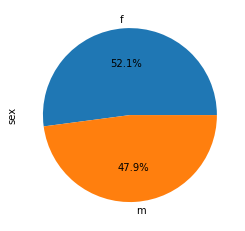

In [140]:

df3_client_u["sex"].value_counts().plot.pie( autopct='%1.1f%%')

La répartition Homme/Femme est à peu près égale bien que les femmes soient en majorité

In [141]:
df3_client_u["Age"].mean()

43.26767441860465

L'age moyen d'un client est de 43 ans

### **Répartition des clients par tranche d'âge**

In [ ]:
bins= [17,25,40,60,93]
labels= ["17-24", "25-39", "40-59",">60"]

df3_client_u['AgeGroup'] = pd.cut(df3_client_u['Age'], bins=bins, labels=labels, right=False)

In [138]:
age= df3_client_u.AgeGroup.dropna().unique().tolist()
age.sort()
lst_age =[]
for x in age:
 lst_age.append(df3_client_u.AgeGroup[df3_client_u.AgeGroup == x].count())

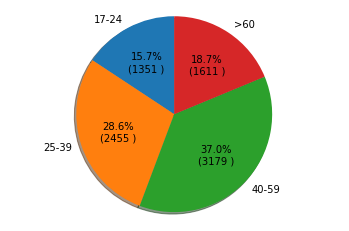

In [152]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = age
sizes = [lst_age[0],
       lst_age[1],
        lst_age[2],
        lst_age[3]]
explode = ( 0.0, 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*sum(allvals) ,2) )
    return "{:.1f}%\n({:.0f} )".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_age),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Les personnes âgés de 25 à 59 ans représentent 65% de la clientèle. Les jeunes et les personnes âgées représentent quant à eux le tiers restant.

### **Répartition du CA par tranche d'âge**

In [125]:
age= df3.AgeGroup.dropna().unique().tolist()
lst_age =[]
for x in age:
 lst_age.append(df3.price[df3.AgeGroup == x].sum())

Text(0.5, 0.98, "Répartition du CA par Tranche d'âge")

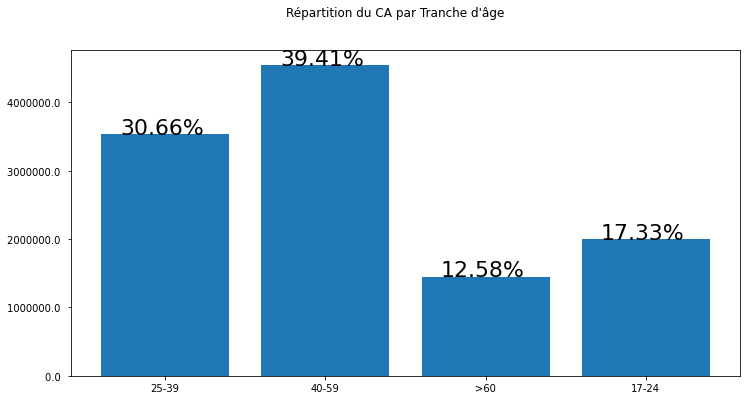

In [126]:
names = age
values = lst_age
def tonnes(x, pos):
    """The two args are the value and tick position."""
    return '{:1.1f} '.format(x)
fig, axs = plt.subplots(1, figsize=(12, 6))
axs.yaxis.set_major_formatter(tonnes)
axs.bar(names, values)

totals = []

# find the values and append to list
for i in axs.patches:
    totals.append(i.get_height())
# set individual bar lables using above list
total = sum(totals)
# set individual bar lables using above list
for i in axs.patches:
    
    # get_x pulls left or right; get_height pushes up or down
    axs.text(i.get_x()+.12, i.get_height()-3, \
            str(round((i.get_height()/(df3.price.sum() ))*100, 2))+'%', fontsize=22,
                color='black')
fig.suptitle("Répartition du CA par Tranche d'âge")

Les clients âgés de 40 à 59 ans représentent la plus grosse part du CA et vient ensuite ceux âgés de 25 à 39 ans.

### Evolution du CA par mois et par Sexe avec une moyenne mobile de 15 jours

In [576]:
df_f_CA = df3["price"][df3["sex"] == 'f'].resample('D').sum()
df_m_CA = df3["price"][df3["sex"] == 'm'].resample('D').sum()

Text(0.5, 1.0, 'Evolution du CA par Genre')

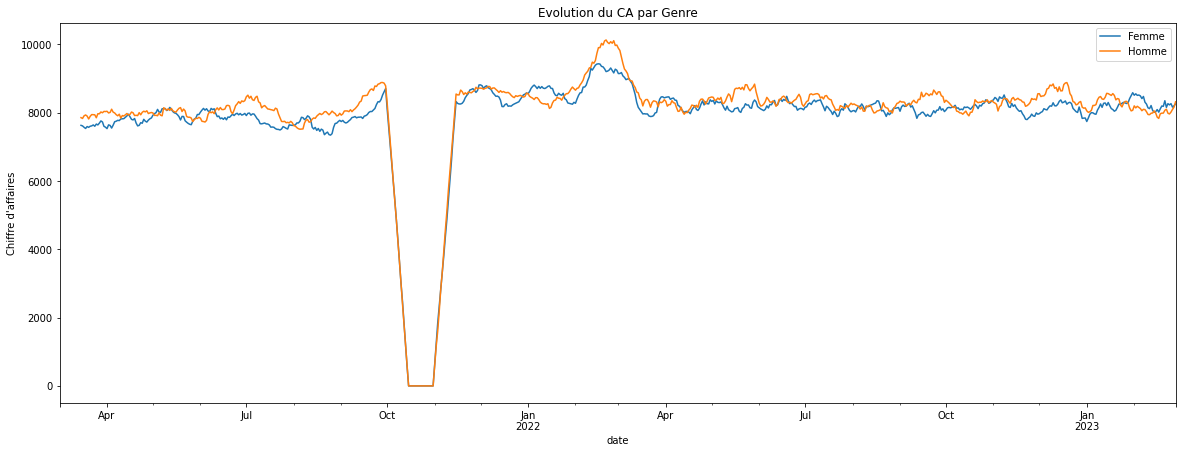

In [577]:
df_f_CA.rolling(15).mean().plot(kind='line', subplots=False,figsize=(20,7))
df_m_CA.rolling(15).mean().plot(kind='line', subplots=False,figsize=(20,7))
plt.ylabel("Chiffre d'affaires")
plt.legend(["Femme","Homme"])
plt.title("Evolution du CA par Genre")

Ici l'on peut voir une saisonalité haussière pour le mois de Janvier.

## Courbe de LORENZ - Répartition du CA par Genre

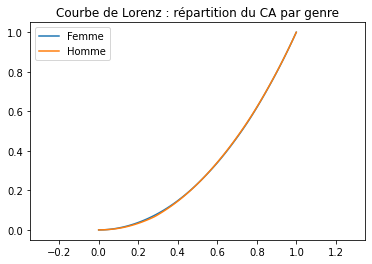

In [402]:
import numpy as np


depF = df3.price[df3["sex"] == 'f'].cumsum()
depM = df3.price[df3["sex"] == 'm'].cumsum()

n = len(depM)
nF = len(depF)
lorenzF = np.cumsum(np.sort(depF)) / depF.sum()
lorenzF = np.append([0],lorenzF) # La courbe de Lorenz commence à 0

lorenzM = np.cumsum(np.sort(depM)) / depM.sum()
lorenzM = np.append([0],lorenzM) # La courbe de Lorenz commence à 0

plt.axes().axis('equal')
xaxis = np.linspace(0-1/nF,1+1/nF,nF+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenzF,drawstyle='steps-post')
xaxisM = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxisM,lorenzM,drawstyle='steps-post',label="Homme")
plt.legend(["Femme","Homme"])
plt.title("Courbe de Lorenz : répartition du CA par genre")


plt.show()

### Indice de Gini :

In [585]:
AUC = (lorenzF.sum() -lorenzF[-1]/2 -lorenzF[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print(f"L'indice de Gini est de : {round(gini,3)}")

L'indice de Gini est de : 0.335


L'indice de Gini et la courbe de Lorenz nous montrent que la répartition du CA global n'est pas égale, regardons le panier clients pour en savoir plus sur cette inégalité.

### Prétraitement pour calculer le panier total des clients

Je mets en index le client_id

In [84]:
df3_ind_client= df3.set_index(df3["client_id"])

Je crée une colonne **nb_achats_client** pour calculer le panier total de chaque client

In [85]:
df3_ind_client["nb_achats_client"] = df3_ind_client.index.value_counts()

Ensuite, je crée un dataframe avec comme index **client_id** mais cette fois ci unique et je calcule le panier client

In [86]:
lst_cln = df3_ind_client.index.unique()
panier=[]
for i in lst_cln:
   val_list = {"client_id" : i,
                "panier_client" : df3_ind_client["price"][df3_ind_client.index == i].sum()
               }
   panier.append(val_list)


In [87]:
df3_panier = pd.DataFrame(data=panier)
df3_panier.set_index('client_id',inplace=True)

In [88]:
df3_uniq_custom = df3_ind_client[~df3_ind_client.index.duplicated(keep='first')]

J'ajoute la colonne **panier_client**

In [89]:
df3_uniq_custom["panier_client"] = df3_panier['panier_client']

<ipython-input-89-95fbb961cffd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_uniq_custom["panier_client"] = df3_panier['panier_client']


In [652]:
df3_uniq_custom

,price,categ,session_id,client_id,id_prod,sex,birth,Age,nb_achats_client,panier_client
client_id,,,,,,,,,,
c_6389,19.99,0,s_168213,c_6389,0_1421,f,1991.0,31.0,229,2990.67
c_8364,19.99,0,s_299590,c_8364,0_1421,m,1973.0,49.0,109,1658.27
c_3544,19.99,0,s_92304,c_3544,0_1421,f,1967.0,54.0,148,2338.49
c_1025,19.99,0,s_325369,c_1025,0_1421,m,1984.0,39.0,255,3602.72
c_2298,19.99,0,s_70071,c_2298,0_1421,m,1972.0,49.0,293,3627.57
...,...,...,...,...,...,...,...,...,...,...
c_1232,19.85,0,s_184472,c_1232,0_142,f,1960.0,62.0,2,39.70
c_6837,57.99,2,s_278304,c_6837,2_181,f,1995.0,27.0,2,115.98
c_5962,13.99,1,s_85267,c_5962,1_367,f,1997.0,24.0,1,13.99


### Top et Flop des paniers clients

In [649]:
df3_uniq_custom["panier_client"].sort_values()

client_id
c_8140         8.30
c_8114         9.98
c_240         11.06
c_4648        11.20
c_2793        12.99
            ...    
c_2899      5214.05
c_3454    111766.71
c_6714    149783.75
c_4958    282654.61
c_1609    312755.08
Name: panier_client, Length: 8598, dtype: float64

Ici, on voit qu'il y a 4 clients avec un panier anormalement élevé (>100 000 euros) sur 2 ans.

Nombre de livres achetés en moyenne par ces gros clients : 

In [197]:
df3_uniq_custom["panier_client"].sort_values().tail(4).mean() / df3_uniq_custom["price"].mean()

10513.710901269564

Ce qui équivaut à acheter environ 5000 livres par an. On peut supposer que ce sont des grossistes.

Pour l'analyse du profil client, il serait préférable de les considérer comme des outliers. Mais avant, j'utilise le Z-Score pour m'en assurer.

In [235]:
# Prix moyen
mean = np.mean(df3_uniq_custom["panier_client"])
# Ecart type du prix
std = np.std(df3_uniq_custom["panier_client"])
print('La moyenne de price est : ', round(mean,2))
print("L'écart type de price est : ", round(std,2))

La moyenne de price est :  1374.5
L'écart type de price est :  5175.53


In [239]:
threshold = 1.5
outlier = []
for i in df3_uniq_custom["panier_client"]:
    z = (i-mean)/std
    if z > threshold:
        print(f"Le Z-Score de la valeur aberrante {i} est : {round(z,2)}")
        outlier.append(i)
print("\nUn Z-Score supérieur à 1.5 révèle un outlier.")
print('Les valeurs aberrantes dans price sont : ', outlier)

Le Z-Score de la valeur aberrante 324033.35000000003 est : 62.34
Le Z-Score de la valeur aberrante 153598.92 est : 29.41
Le Z-Score de la valeur aberrante 113637.93000000001 est : 21.69
Le Z-Score de la valeur aberrante 289760.33999999997 est : 55.72

Un Z-Score supérieur à 1.5 révèle un outlier.
Les valeurs aberrantes dans price sont :  [324033.35000000003, 153598.92, 113637.93000000001, 289760.33999999997]


Le Z-Score me confirme que ce sont des outliers, je les supprime.

In [90]:
df_panier_pt = df3_uniq_custom[df3_uniq_custom["panier_client"] < 5500]

In [91]:
df_panier_pt.dropna(inplace=True)

<ipython-input-91-3e6b4762cd37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panier_pt.dropna(inplace=True)


In [221]:
df_panier_pt.categ = df_panier_pt.categ.astype("int64")

D:\Users\asus\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Demandes de Julie

## **Le lien entre le genre d’un client et les catégories des livres achetés**

### Tableau de Contingence pour analyser la corrélation entre 2 variables qualitatives (sex, categ)

In [669]:
X = "sex"
Y = "categ"
cont = df_panier_pt[[X,Y]].pivot_table(index=Y,columns=X,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0,2241,2079,4320
1,1773,1596,3369
2,464,443,907
Total,4478,4118,8596


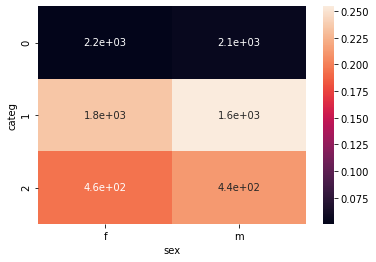

In [670]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_panier_pt)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

### Test d'indépendance de Khi 2 :

In [671]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

In [672]:
# Statistique khi2
print(f"Statistique khi2 : {st_chi2}")

# Nombe de degrés de liberté
print(f"Nombe de degrés de liberté : {st_dof}")

# Pvalue : l'unique valeur nécessaire pour prendre notre décision
print(f"Pvalue : {st_p}" )

Statistique khi2 : 0.7850138388176434
Nombe de degrés de liberté : 6
Pvalue : 0.992469480675621


Ce qui nous intéresse ici, c’est la variable st_p, qui contient la pvalue. Celle-ci est calculée par scipy de la manière suivante :

   - Calcul de la stat khi2
   - Calcul du nombre de degrés de liberté k
   - Calcul de la loi à densité suivie par une loi khi2 à k degrés de liberté
   - Confrontation de la stat khi2 calculée avec la loi à densité obtenue

L’hypothèse nulle est que les variables sont indépendantes. La p-valeur nous indique quelle probabilité (matérialisée par l’aire sous la courbe de la loi à densité) représente les valeurs encore plus éloignées que celle obtenue.

Test au seuil de 5%

Rejetons l’hypothèse nulle au seuil de 5%, donc pour une pvaleur inférieure à 0.05.

Dans notre cas, la pvaleur obtenue par notre échantillon est de 0.99246, ce qui est bien au dessus du seuil fixé. On ne peut donc rejeter l’hypothèse nulle. Les variables **« sex »** et **« categ »** sont indépendantes. 

## **Lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés**

Vérifions la tranche d'âge des clients

In [213]:
df_panier_pt["Age"].sort_values()

client_id
c_1590    17.0
c_609     17.0
c_1692    17.0
c_4381    17.0
c_7154    17.0
          ... 
c_3218    92.0
c_7232    92.0
c_577     92.0
c_5302    93.0
c_8362    93.0
Name: Age, Length: 8596, dtype: float64

Les clients ont entre 17 ans et 93 ans

Créons les catégories d'âge (17-24 , 25-39 ,40-59, >60 ) 

In [ ]:
bins= [17,25,40,60,93]
labels= ["17-24", "25-39", "40-59",">60"]

df_panier_pt['AgeGroup'] = pd.cut(df_panier_pt['Age'], bins=bins, labels=labels, right=False)

### **Répartition des catégories de produits par tranche d'âge**

Je créé une liste des catégories par chaque tranche d'âge

In [173]:
cat= df3.categ.unique().tolist()
age= df3.AgeGroup.dropna().unique().tolist()
age.sort()
lst_cat1 =[]
for x in cat:
 lst_cat1.append(df3.categ[(df3.categ == x) & (df3.AgeGroup == age[0]) ].count())
lst_cat2 =[]
for x in cat:
 lst_cat2.append(df3.categ[(df3.categ == x) & (df3.AgeGroup == age[1]) ].count())
lst_cat3 =[]
for x in cat:
 lst_cat3.append(df3.categ[(df3.categ == x) & (df3.AgeGroup == age[2]) ].count())
lst_cat4 =[]
for x in cat:
 lst_cat4.append(df3.categ[(df3.categ == x) & (df3.AgeGroup == age[3]) ].count())

**Répartition des 17-24 ans par catégorie**

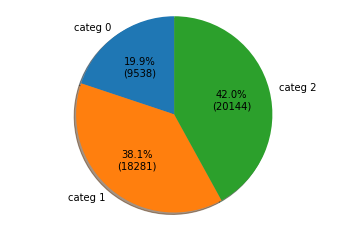

In [180]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["categ 0","categ 1","categ 2"]
sizes = [lst_cat1[0],
       lst_cat1[1],
        lst_cat1[2]]
explode = ( 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*sum(allvals) ,2) )
    return "{:.1f}%\n({:.0f})".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_cat1),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Répartition des 25-39 ans par catégorie**

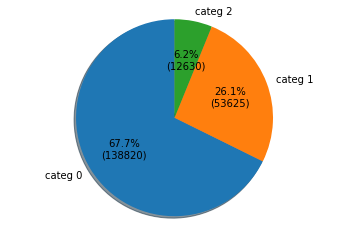

In [181]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["categ 0","categ 1","categ 2"]
sizes = [lst_cat2[0],
       lst_cat2[1],
        lst_cat2[2]]
explode = ( 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*sum(allvals) ,2) )
    return "{:.1f}%\n({:.0f})".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_cat2),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Répartition des 40-59 ans par catégorie**

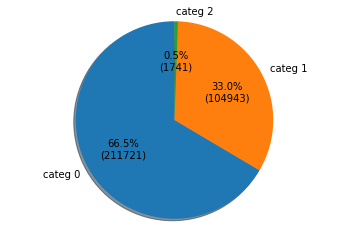

In [182]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["categ 0","categ 1","categ 2"]
sizes = [lst_cat3[0],
       lst_cat3[1],
        lst_cat3[2]]
explode = ( 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*sum(allvals) ,2) )
    return "{:.1f}%\n({:.0f})".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_cat3),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Répartition des >60 ans par catégorie**

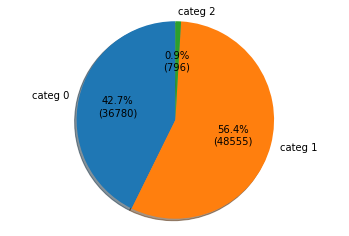

In [183]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["categ 0","categ 1","categ 2"]
sizes = [lst_cat4[0],
       lst_cat4[1],
        lst_cat4[2]]
explode = ( 0.0, 0.0, 0.0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = float(round(pct/100.*sum(allvals) ,2) )
    return "{:.1f}%\n({:.0f})".format(pct, absolute)
ax1.pie(sizes, explode=explode, labels=labels, autopct=lambda pct: func(pct, lst_cat4),
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Les jeunes (17-24 ans) achètent en majorité (42%) des produits plus chers appartenant à la catégorie 2.

### Tableau de Contingence pour analyser la corrélation entre 2 variables qualitatives (Age, categ)

In [666]:
X = "AgeGroup"
Y = "categ"
cont = df_panier_pt[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

categ,0,1,2,Total
AgeGroup,,,,
17-24,287,552,514,1353
25-39,1372,719,365,2456
40-59,1962,1199,14,3175
>60,699,897,14,1610
Total,4320,3367,907,8594


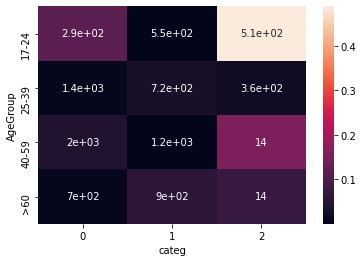

In [667]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_panier_pt)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

### Test de Khi 2 : 

In [668]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

# Statistique khi2
print(f"Statistique khi2 : {st_chi2}")

# Nombe de degrés de liberté
print(f"Nombe de degrés de liberté : {st_dof}")

# Pvalue : l'unique valeur nécessaire pour prendre notre décision
print(f"Pvalue : {st_p}" )

Statistique khi2 : 1976.7776821071288
Nombe de degrés de liberté : 12
Pvalue : 0.0


L’hypothèse nulle est que les variables sont indépendantes.

Test au seuil de 5%

Rejetons l’hypothèse nulle au seuil de 5%, donc pour une pvaleur inférieure à 0.05.

Dans notre cas, la pvaleur obtenue par notre échantillon est de 0.0, ce qui est en dessous du seuil fixé. On peut donc rejeter l’hypothèse nulle. Les variables **« Age »** et **« categ »** ne sont pas indépendantes. 

On remarque un corrélation entre l'âge et la catégorie de produits achetés. Les jeunes achètent des produits de la catégorie 2. Les catégories sont liées au prix donc il y aura une corrélation entre l'âge et le panier moyen.

In [226]:
df_panier_pt.groupby(by="AgeGroup").median()

,price,categ,birth,Age,nb_achats_client,panier_client
AgeGroup,,,,,,
17-24,22.99,1,2002.0,20.0,30.0,1103.790
25-39,13.79,0,1989.0,32.0,57.0,1214.865
40-59,13.11,0,1973.0,48.0,69.0,1028.310
>60,13.79,1,1954.0,67.0,45.0,741.675


## **Relation Montant total des achats des clients / Groupe d'Age**

On voit ici que les montants ne sont pas très différents d'une catégorie à l'autre.

Par contre, les montants des 25-39 sont plus élevés et plus dispersés que ceux des >60. 

Mais vérifions maintenant cette affirmation par les chiffres, grâce à une modélisation.

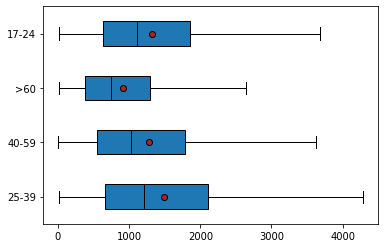

In [462]:
X = "AgeGroup"
Y = "panier_client"

modalites = df_panier_pt[X].unique().dropna()
groupes = []
for m in modalites:
    groupes.append(df_panier_pt[df_panier_pt[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

### Test de Normalité  (Shapiro-Wilk)

In [780]:
# Test de Shapiro-Wilk

from scipy.stats import shapiro

# Test de Normalité
stat, p = shapiro(df_panier_pt['panier_client'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpretation
alpha = 0.05
if p > alpha:
 print("L'échantillon semble suivre une loi normale (On ne rejette pas H0)")
else:
 print("L'échantillon semble ne pas suivre une loi normale (On rejette H0)")

Statistics=0.904, p=0.000
L'échantillon semble ne pas suivre une loi normale (On rejette H0)


D:\Users\asus\anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Donc j'effectue un test d'ANOVA non paramétrique c.à.d celui de Kruskal Wallis

In [778]:
kstat, pval = st.stats.kruskal(*[group['panier_client'].values for name , group in df_panier_pt.groupby('AgeGroup') ] )
alpha = 0.05
if p > alpha:
	print("Aucun lien entre le panier_client et l'âge (on ne rejette pas H0)")
else:
	print("Il existe un lien entre le panier client et l'âge (on rejette H0)")
# Récupérer la p-value

print(f"P-Value : {pval}") # Si pval petit (au moins inférieure à 0.05, alors on peut parler de différence significative)

Il existe un lien entre le panier client et l'âge (on rejette H0)
P-Value : 6.067024336367789e-74


Quel est la force de ce lien ? 

Il n’y a pas de coefficient de force avec les 
tests non paramétrique

## Test d'ANOVA : (ESSAI POUR CONFIRMER MES PROPOS)

Je construis une fonction pouvant calculer le rapport de corrélation 

In [444]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    

In [275]:
eta_squared(df_panier_pt[X],df_panier_pt[Y])

0.042136059912782124

Si η2Y/X=0 , cela signifie que les moyennes par classes sont toutes égales. Il n’y a donc pas a priori de relation entre les variables Y et X.

Au contraire, si η2Y/X=1 , cela signifie que les moyennes par classes sont très différentes, chacune des classes étant constituée de valeurs identiques : il existe donc a priori une relation entre les variables Y et X.

Ici, il n'y a pas de corrélation entre le Montant total des achats des clients et l'âge en suivant le test d'ANOVA. 

Hors l'échantillon ne suit pas une loi normale donc cette hypothèse est fausse.

## **Relation Panier moyen des clients et fréquence d'achat / Groupe d'Age**

<AxesSubplot:xlabel='AgeGroup'>

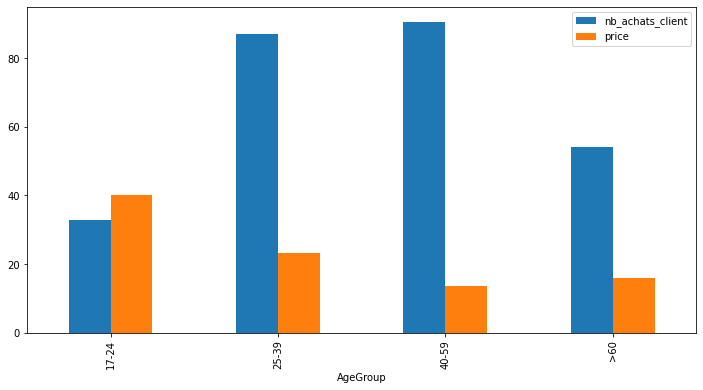

In [693]:
df_panier_pt[["nb_achats_client"] +["price"] + ["AgeGroup"]].groupby(by="AgeGroup").mean().plot.bar(figsize=(12,6))

Sur ce graphique nous voyons les corrélations entre ces variables mais effectuons quelques tests pour confirmer

Effectuons un test non-paramétrique afin de déterminer si les variables suivent une loi normale, j'ai choisi celui de **Kolmogorov Smirnov**.

In [785]:
Y = "nb_achats_client"
Y2= "price"
Y3 = "panier_client"

In [793]:
from scipy.stats import ks_2samp
from scipy.stats import kstest

stat_test,p_value=kstest(df_panier_pt[Y], 'norm')
print("la statistique de test est :",stat_test)
print("la p_value du test est ", p_value)


la statistique de test est : 0.9928334430572484
la p_value du test est  0.0


La distribution du panier moyen et du nb_d'achats_client ne suivent pas une loi normale (elle sont donc non-Gaussienne). 

Je ne peux utiliser le Test d'ANOVA car l'échantillon que nous avons à disposition ne vérifie pas les hypothèses données.

J'utilise donc le coef. de corrélation de Spearman.

## **Corrélation de Spearman**

 Spearman confirmera la corrélation entre le panier moyen et l'âge déduite précédemment.
 
 Ici, j'ai besoin de 2 variables quantitatives donc je n'utilise pas la variable AgeGroup mais Age.

<AxesSubplot:>

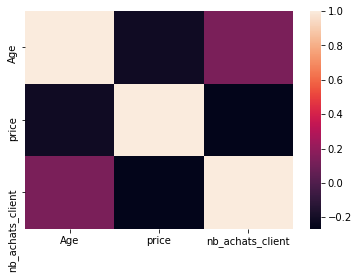

In [603]:
sns.heatmap(df_panier_pt[["Age"] + ["price"]+  ["nb_achats_client"]].corr(method="spearman"))

In [602]:
df_panier_pt[["Age"] + ["price"] + ["nb_achats_client"]].corr(method="spearman")

,Age,price,nb_achats_client
Age,1.000000,-0.212695,0.129413
price,-0.212695,1.000000,-0.265969
nb_achats_client,0.129413,-0.265969,1.000000


Cela indique une légère corrélation positive entre la fréquence d'achat et l'âge.

Par contre entre l'âge et le panier moyen il y a une corrélation négative c.à.d que si l'âge augmente, le panier moyen descend.

Pour confirmer la corrélation entre la frequence d'achat et l'âge , j'effectue un **test de Khi2**.

Tout d'abord je crée des tranches du nombre d'achat client et je crée un tableau de contingence.

In [ ]:
bins= [1,25,40,60,93,400]
labels= ["<24", "25-39", "40-59","60-92",">92"]

df_panier_pt['nb_achats_client_Group'] = pd.cut(df_panier_pt['nb_achats_client'], bins=bins, labels=labels, right=False)

In [ ]:
df_panier_pt['nb_achats_client_Group'] = df_panier_pt['nb_achats_client_Group'].astype("object")

In [636]:
X = "AgeGroup"
Y = "nb_achats_client_Group"
cont = df_panier_pt[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

nb_achats_client_Group,25-39,40-59,60-92,<24,>92,Total
AgeGroup,,,,,,
17-24,328,320,138,555,12,1353
25-39,379,406,394,479,797,2455
40-59,435,504,630,437,1168,3174
>60,314,295,312,409,280,1610
Total,1456,1525,1474,1880,2257,8592


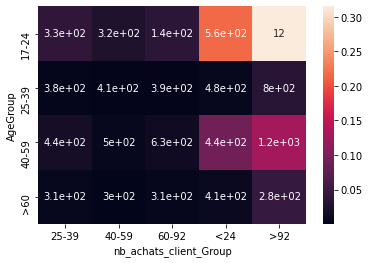

In [637]:
import seaborn as sns

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(df_panier_pt)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

In [638]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)

# Statistique khi2
print(f"Statistique khi2 : {st_chi2}")

# Nombe de degrés de liberté
print(f"Nombe de degrés de liberté : {st_dof}")

# Pvalue : l'unique valeur nécessaire pour prendre notre décision
print(f"Pvalue : {st_p}" )

Statistique khi2 : 1052.1850305263513
Nombe de degrés de liberté : 20
Pvalue : 2.8720965592432894e-210


Test au seuil de 5%

Rejetons l’hypothèse nulle au seuil de 5%, donc pour une pvaleur inférieure à 0.05.

Dans notre cas, la pvaleur obtenue par notre échantillon est très en dessous du seuil fixé. On peut donc rejeter l’hypothèse nulle. Les variables **« Age »** et **« nb_d'achats_client »** ne sont pas indépendantes. 

On remarque une corrélation entre l'âge et la fréquence d'achat. Les jeunes achètent moins de produits que les personnes plus âgées.

## **Calculer la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159**

In [369]:
df_uniq[(df_uniq["id_prod"] == "2_159") | (df_uniq["id_prod"] == "0_525")]

,price,categ,date,session_id,client_id,id_prod,nb vente,CA par produit
id_prod,,,,,,,,
2_159,145.99,2,2023-02-03 00:00:21.794867,s_336117,c_6135,2_159,650,94893.5
0_525,2.99,0,2021-04-01 15:38:20.291404,s_14513,c_1403,0_525,500,1495.0


Je crée les colonnes des références produits 2_159 et 0_525 achetées. Noté 1 si acheté et sinon 0. 

In [306]:
df3_ind_client["2_159"] = (df3_ind_client["id_prod"] == "2_159")
df3_ind_client["0_525"] = (df3_ind_client["id_prod"] == "0_525")
df3_ind_client["2_159"][df3_ind_client["2_159"] == True] = 1
df3_ind_client["0_525"][df3_ind_client["0_525"] == True] = 1

In [370]:
df3_ind_client[(df3_ind_client["id_prod"] == "2_159") | (df3_ind_client["id_prod"] == "0_525")]

,price,categ,session_id,client_id,id_prod,sex,birth,Age,nb_achats_client,2_159,0_525
client_id,,,,,,,,,,,
c_1025,145.99,2,s_245285,c_1025,2_159,m,1984.0,38.0,263.0,1.0,0.0
c_1025,145.99,2,s_257493,c_1025,2_159,m,1984.0,38.0,263.0,1.0,0.0
c_1025,2.99,0,s_257493,c_1025,0_525,m,1984.0,38.0,263.0,0.0,1.0
c_1025,2.99,0,s_245285,c_1025,0_525,m,1984.0,38.0,263.0,0.0,1.0
c_774,145.99,2,s_215767,c_774,2_159,f,1959.0,63.0,92.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
c_946,145.99,2,s_171131,c_946,2_159,m,2001.0,21.0,18.0,1.0,0.0
c_275,145.99,2,s_12426,c_275,2_159,f,1951.0,70.0,12.0,1.0,0.0
c_275,2.99,0,s_12426,c_275,0_525,f,1951.0,70.0,12.0,0.0,1.0


Je groupe les références nécessaires à la requête par client_id et je les additionne ce qui me donne un tableau représentant si un client a acheté les 2 ouvrages ou pas.

In [350]:
df3_link = df3_ind_client[["2_159"] + ["0_525"]].groupby(by="client_id").sum()

Ensuite je fais le calcul de la probabilité conditionnelle demandée: P(2_159 inter 0_525)/ P(2_159)

In [804]:
(df3_link[(df3_link["2_159"] > 0) & (df3_link["0_525"] > 0 )].shape[0] /df3_ind_client.index.nunique() ) / (df3_link[(df3_link["2_159"] > 0)].shape[0] / df3_ind_client.index.nunique() )

0.8660377358490566

86.60% ont acheté la référence 0_525 après avoir acheté 2_159